In [1]:
! pip install yfinance

  Stored in directory: C:\Users\srema\AppData\Local\pip\Cache\wheels\04\5a\1f\e28b00571b1a77858b451eff7df917073e1a479b940cef9933
Successfully built multitasking
  Found existing installation: lxml 4.3.2
    Uninstalling lxml-4.3.2:
      Successfully uninstalled lxml-4.3.2


Error processing line 7 of C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [3]:
import yfinance as yf
msft = yf.Ticker("BTC-USD")
print(msft.info)

{'companyOfficers': [], 'name': 'Bitcoin', 'startDate': 1367107200, 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,882,875. The last known price of Bitcoin is 58,647.26190846 USD and is up 3.81 over the last 24 hours. It is currently trading on 8347 active market(s) with $34,798,046,427.24 traded over the last 24 hours. More information can be found at https://bitcoin.org/.', 'maxAge': 1, 'exchange': 'CCC', 'shortName': 'Bitcoin USD', 'exchangeTimezoneName': 'UTC', 'exchangeTimezoneShortName': 'UTC', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '0', 'quoteType': 'CRYPTOCURRENCY', 'symbol': 'BTC-USD', 'messageBoardId': 'finmb_BTC_CCC', 'market': 'ccc_market', 'previousClose': 57025.24, 'regularMarketOpen': 57025.24, 'twoHundredDayAverage': 46139.656, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': 35517280256, 'regularMarketDayHigh': 57329.58, 'navPrice': No

In [11]:
def save_price_data(ticker):

    data = yf.download(ticker, interval='1wk', start="2017-01-01", end="2021-12-01")
    
    data.to_csv(f"data/{ticker}.csv", index=False)

In [12]:

save_price_data(ticker)

[*********************100%***********************]  1 of 1 completed


In [13]:
tickers = [
    'BTC-USD', 'ETH-USD'
]

In [18]:
import yahoo_fin

test = yahoo_fin.stock_info.get_top_crypto()
test

AttributeError: module 'yahoo_fin' has no attribute 'stock_info'

In [32]:
import os
import time

import yfinance as yf
from yahoo_fin.stock_info import *

filter_list = [
    'DOGE-USD', 'USDT-USD', 'USDC-USD', 'SHIB-USD', 'WBTC',
    'BUSD-USD', 'UST-USD', 'DAI-USD', 'TUSD'
]

def get_tickers():
    
    # Automatische check toevoegen om te zien of de ticker al in de lijst staat.
    top100 = get_top_crypto()
    
    return list(top100['Symbol'])
    
def filter_tickers(tickers, filter_list):
    
    filtered_tickers = tickers
    
    for item in filter_list:
        try:
            filtered_tickers.remove(item)
        except: 
            pass 
    
    return filtered_tickers


def save_price_data(ticker):

    data = yf.download(ticker, interval='1wk', start="2017-01-01", end="2021-12-01")
    
    data.to_csv(f"data/{ticker}.csv")
    

def download_tickers(tickers):
    
    for ticker in tickers:
        path = f'data/{ticker}.csv'
        if os.path.isfile(path):
            pass
        else:
            time.sleep(10)
            try:
                save_price_data(ticker)
            except Exception:
                print(f'{ticker} is unavailable')
        


In [71]:
import os
import pandas as pd 

def merge_ticker_data(path, base_token_pair='BTC-USD'):
    
    df_data = pd.read_csv(f'{path}\\{base_token_pair}.csv')
    df_data['Date'] = pd.to_datetime(df_data['Date'])
    df_data = df_data.rename({'Close': base_token_pair}, axis='columns')
    df_data = df_data[['Date', base_token_pair]]
    
    df_merge = df_data.copy()
    
    for filename in os.listdir(path):
        token_pair = filename.replace(".csv", "")
        f = os.path.join(path, filename)

        # checking if it is a file
        if os.path.isfile(f) and f != f'{path}\\{base_token_pair}.csv':
            try:
                df_new = pd.read_csv(f)
                df_new['Date'] = pd.to_datetime(df_new['Date'])
                df_new = df_new.rename({'Close': token_pair}, axis='columns')
                df_new = df_new[['Date', token_pair]]
                df_merge = df_merge.merge(df_new, how='left', on='Date')
                
            except Exception as e:
                print(e)
    
    df = df_merge.set_index('Date')
    df = df.pct_change()
    
    return df


In [191]:
import numpy as np

def get_top10_picks(df):
    
    df_ = df.to_numpy()
    weekly_returns = {0: np.nan} #{0: NaN}
    
#     for index, row in df.iterrows():
    for i in range(df_.shape[0]-1):
        
        
        
        try:
            top_10 = df.iloc[i].sort_values(ascending=False).index.to_list()[:10]
            print(top_10)
            next_week = df.iloc[i+1]
            print("Next ",next_week)
            returns = []

            for token in top_10:
                returns.append(next_week[token])

            returns_mean = np.mean(returns)
            weekly_returns[i+1] = returns_mean
            
        except Exception as e:
            print(e)
    
    df_returns = pd.DataFrame.from_dict(weekly_returns, orient='index')
    df_returns = df_returns.rename({0: 'Top_10'}, axis='columns')
    df_returns = df_returns.set_index(df.index.values)
    return df_returns


In [33]:
tickers = get_tickers()
tickers = filter_tickers(tickers, filter_list)
download_tickers(tickers)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [193]:
def cummulative_returns(df):
    
    df_perc_ret = df + 1
    df_ = df_perc_ret.to_numpy()
#     print(np.isnan(df_[0,0]))
    df_new = np.ones(df_.shape)
    
    for i in range(df_.shape[0]):        
        
        for j in range(df_.shape[1]):
            try:
                if np.isnan(df_[i-1,j]) != False:
                    pass
                else:
                    df_new[i,j] = df_[i,j] * df_new[i-1,j]
            except: 
                pass
    
    df_results = pd.DataFrame(df_new, index=df.index.values, columns=df.columns)
    
    return df_results



In [73]:
path= 'data'
df = merge_ticker_data(path)

In [192]:
df_top10 = get_top10_picks(df)

['BTC-USD', 'AAVE-USD', 'ADA-USD', 'ALGO-USD', 'AMP1-USD', 'ANKR-USD', 'AR-USD', 'ATOM1-USD', 'AVAX-USD', 'AXS-USD']
Next  BTC-USD    -0.087272
AAVE-USD         NaN
ADA-USD          NaN
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.048710
ZEN-USD          NaN
ZIL-USD          NaN
ZRX-USD          NaN
Name: 2017-01-02 00:00:00, Length: 96, dtype: float64
['DCR-USD', 'SC-USD', 'ETH-USD', 'DASH-USD', 'ETC-USD', 'XEM-USD', 'XRP-USD', 'WAVES-USD', 'XMR-USD', 'ZEC-USD']
Next  BTC-USD    -0.098114
AAVE-USD         NaN
ADA-USD          NaN
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.020870
ZEN-USD          NaN
ZIL-USD          NaN
ZRX-USD          NaN
Name: 2017-01-09 00:00:00, Length: 96, dtype: float64
['DCR-USD', 'WAVES-USD', 'XRP-USD', 'XEM-USD', 'XLM-USD', 'SC-USD', 'DASH-USD', 'LTC-USD', 'ZEC-USD', 'ETH-USD']
Next  BTC-USD     0.125183
AAVE-USD         NaN
ADA-USD          NaN
ALGO-U

Name: 2017-09-11 00:00:00, Length: 96, dtype: float64
['BAT-USD', 'LRC-USD', 'DCR-USD', 'MIOTA-USD', 'MKR-USD', 'DASH-USD', 'STORJ-USD', 'EOS-USD', 'NEO-USD', 'ETH-USD']
Next  BTC-USD     0.027899
AAVE-USD         NaN
ADA-USD          NaN
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD     0.180559
ZEN-USD     0.025574
ZIL-USD          NaN
ZRX-USD    -0.143179
Name: 2017-09-18 00:00:00, Length: 96, dtype: float64
['LRC-USD', 'SC-USD', 'ZEC-USD', 'DCR-USD', 'ETH-USD', 'WAVES-USD', 'BNT-USD', 'XEM-USD', 'DASH-USD', 'MIOTA-USD']
Next  BTC-USD     0.195746
AAVE-USD         NaN
ADA-USD          NaN
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD     0.283618
ZEN-USD     0.149423
ZIL-USD          NaN
ZRX-USD     0.212876
Name: 2017-09-25 00:00:00, Length: 96, dtype: float64
['LRC-USD', 'LINK-USD', 'BNB-USD', 'NEO-USD', 'QTUM-USD', 'EOS-USD', 'BAT-USD', 'ZEC-USD', 'WAVES-USD', 'ETC-USD']
Next  BTC-USD     

['ZEN-USD', 'TUSD-USD', 'CEL-USD', 'TRX-USD', 'RVN-USD', 'EOS-USD', 'XTZ-USD', 'BNB-USD', 'XRP-USD', 'BTC-USD']
Next  BTC-USD     0.047777
AAVE-USD         NaN
ADA-USD     0.178743
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.030492
ZEN-USD    -0.124395
ZIL-USD     0.097356
ZRX-USD     0.137607
Name: 2018-05-28 00:00:00, Length: 96, dtype: float64
['IOTX-USD', 'THETA-USD', 'ONT-USD', 'MIOTA-USD', 'MANA-USD', 'ADA-USD', 'BCH-USD', 'EOS-USD', 'XTZ-USD', 'STORJ-USD']
Next  BTC-USD    -0.121010
AAVE-USD         NaN
ADA-USD    -0.224787
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.196155
ZEN-USD    -0.382086
ZIL-USD    -0.187472
ZRX-USD    -0.214541
Name: 2018-06-04 00:00:00, Length: 96, dtype: float64
['TUSD-USD', 'CEL-USD', 'BNB-USD', 'XTZ-USD', 'DCR-USD', 'MANA-USD', 'SC-USD', 'BTC-USD', 'XRP-USD', 'WAVES-USD']
Next  BTC-USD    -0.042256
AAVE-USD         NaN
ADA-USD    -0.087568
ALGO

Name: 2019-01-28 00:00:00, Length: 96, dtype: float64
['QNT-USD', 'WAVES-USD', 'LTC-USD', 'CEL-USD', 'STORJ-USD', 'TUSD-USD', 'EOS-USD', 'FIL-USD', 'XRP-USD', 'THETA-USD']
Next  BTC-USD     0.065293
AAVE-USD         NaN
ADA-USD     0.126246
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD     0.052593
ZEN-USD     0.133430
ZIL-USD    -0.000969
ZRX-USD     0.032268
Name: 2019-02-04 00:00:00, Length: 96, dtype: float64
['QNT-USD', 'THETA-USD', 'BTT1-USD', 'LTC-USD', 'BNB-USD', 'MKR-USD', 'EOS-USD', 'FTM-USD', 'ICX-USD', 'XMR-USD']
Next  BTC-USD    -0.004431
AAVE-USD         NaN
ADA-USD    -0.032174
ALGO-USD         NaN
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD     0.021397
ZEN-USD     0.000999
ZIL-USD     0.004680
ZRX-USD    -0.037858
Name: 2019-02-11 00:00:00, Length: 96, dtype: float64
['STORJ-USD', 'MKR-USD', 'XTZ-USD', 'CEL-USD', 'BAT-USD', 'ONT-USD', 'ENJ-USD', 'HOT1-USD', 'ETH-USD', 'WAXP-USD']
Next  BTC-USD    

['ZRX-USD', 'XLM-USD', 'LINK-USD', 'MIOTA-USD', 'ETH-USD', 'MKR-USD', 'SC-USD', 'BAT-USD', 'VET-USD', 'TRX-USD']
Next  BTC-USD    -0.195246
AAVE-USD         NaN
ADA-USD    -0.236709
ALGO-USD   -0.246689
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.177337
ZEN-USD    -0.174056
ZIL-USD    -0.180873
ZRX-USD    -0.147868
Name: 2019-09-23 00:00:00, Length: 96, dtype: float64
['TUSD-USD', 'FTT1-USD', 'LINK-USD', 'MIOTA-USD', 'FIL-USD', 'RVN-USD', 'XEM-USD', 'LRC-USD', 'HBAR-USD', 'CRO-USD']
Next  BTC-USD    -0.014317
AAVE-USD         NaN
ADA-USD     0.049032
ALGO-USD   -0.051190
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.048569
ZEN-USD     0.019401
ZIL-USD     0.073241
ZRX-USD     0.053403
Name: 2019-09-30 00:00:00, Length: 96, dtype: float64
['IOTX-USD', 'LINK-USD', 'ATOM1-USD', 'BAT-USD', 'RUNE-USD', 'CHZ-USD', 'OMG-USD', 'STORJ-USD', 'TRX-USD', 'ENJ-USD']
Next  BTC-USD     0.041668
AAVE-USD         NaN
ADA-USD     0.050885
A

Next  BTC-USD     0.068217
AAVE-USD         NaN
ADA-USD     0.280964
ALGO-USD    0.188430
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.044174
ZEN-USD     0.073045
ZIL-USD     0.185333
ZRX-USD     0.148926
Name: 2020-04-20 00:00:00, Length: 96, dtype: float64
['HIVE-USD', 'HEX-USD', 'ENJ-USD', 'THETA-USD', 'KSM-USD', 'SC-USD', 'FTM-USD', 'ADA-USD', 'XLM-USD', 'ICX-USD']
Next  BTC-USD     0.158545
AAVE-USD         NaN
ADA-USD     0.066479
ALGO-USD   -0.079541
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD     0.005942
ZEN-USD    -0.048422
ZIL-USD     0.198853
ZRX-USD     0.042441
Name: 2020-04-27 00:00:00, Length: 96, dtype: float64
['HEX-USD', 'HOT1-USD', 'KSM-USD', 'THETA-USD', 'ZIL-USD', 'BTT1-USD', 'XLM-USD', 'ETC-USD', 'BTC-USD', 'WAXP-USD']
Next  BTC-USD    -0.015851
AAVE-USD         NaN
ADA-USD    -0.025588
ALGO-USD   -0.077587
AMP1-USD         NaN
              ...   
YFI-USD          NaN
ZEC-USD    -0.088197
ZEN-USD    -0.1

Name: 2020-12-07 00:00:00, Length: 96, dtype: float64
['CEL-USD', 'STX1-USD', 'EGLD-USD', 'TFUEL-USD', 'XMR-USD', 'DFI-USD', 'CTC1-USD', 'ONE2-USD', 'THETA-USD', 'WAVES-USD']
Next  BTC-USD     0.226456
AAVE-USD    0.000000
ADA-USD     0.052116
ALGO-USD    0.096596
AMP1-USD    0.000000
              ...   
YFI-USD     0.000000
ZEC-USD     0.106214
ZEN-USD     0.031556
ZIL-USD     0.417617
ZRX-USD    -0.001992
Name: 2020-12-14 00:00:00, Length: 96, dtype: float64
['EGLD-USD', 'ZIL-USD', 'LTC-USD', 'DFI-USD', 'DCR-USD', 'CEL-USD', 'BCH-USD', 'THETA-USD', 'BNT-USD', 'BTC-USD']
Next  BTC-USD     0.119051
AAVE-USD    0.000000
ADA-USD    -0.046707
ALGO-USD   -0.058648
AMP1-USD    0.000000
              ...   
YFI-USD     0.000000
ZEC-USD    -0.089132
ZEN-USD     0.106478
ZIL-USD     0.653330
ZRX-USD    -0.055596
Name: 2020-12-21 00:00:00, Length: 96, dtype: float64
['DFI-USD', 'TFUEL-USD', 'ZIL-USD', 'THETA-USD', 'CEL-USD', 'STX1-USD', 'DCR-USD', 'LUNA1-USD', 'BTC-USD', 'LTC-USD']
Next  BTC-U

['QNT-USD', 'RUNE-USD', 'ANKR-USD', 'LUNA1-USD', 'NEO-USD', 'SC-USD', 'DOT1-USD', 'LINK-USD', 'BTT1-USD', 'STORJ-USD']
Next  BTC-USD     0.095641
AAVE-USD    0.137132
ADA-USD     0.083553
ALGO-USD    0.013855
AMP1-USD   -0.105416
              ...   
YFI-USD     0.031116
ZEC-USD     0.067273
ZEN-USD     0.122461
ZIL-USD     0.089947
ZRX-USD     0.193469
Name: 2021-08-02 00:00:00, Length: 96, dtype: float64
['VGX-USD', 'EGLD-USD', 'RVN-USD', 'QTUM-USD', 'ICP1-USD', 'HOT1-USD', 'BTT1-USD', 'AR-USD', 'XDC-USD', 'UNI3-USD']
Next  BTC-USD     0.074179
AAVE-USD    0.137800
ADA-USD     0.519196
ALGO-USD    0.207203
AMP1-USD    0.004316
              ...   
YFI-USD     0.216465
ZEC-USD     0.250455
ZEN-USD     0.154437
ZIL-USD     0.284565
ZRX-USD     0.137233
Name: 2021-08-09 00:00:00, Length: 96, dtype: float64
['IOTX-USD', 'XRP-USD', 'RVN-USD', 'WAVES-USD', 'ADA-USD', 'KDA-USD', 'HOT1-USD', 'LUNA1-USD', 'SOL1-USD', 'XDC-USD']
Next  BTC-USD     0.048348
AAVE-USD   -0.022474
ADA-USD     0.251

In [151]:
df_strategy = pd.concat([df[['BTC-USD', 'ETH-USD']], df_top10], axis=1) 
df_strategy 

,BTC-USD,ETH-USD,Top_10
2016-12-26,NaN,NaN,NaN
2017-01-02,-0.087272,0.259065,NaN
2017-01-09,-0.098114,-0.037468,0.000035
2017-01-16,0.125183,0.080666,0.021631
2017-01-23,-0.005599,-0.020480,0.031427
...,...,...,...
2021-11-01,0.032747,0.077536,0.275854
2021-11-08,0.033791,0.001256,0.284281
2021-11-15,-0.102897,-0.077086,-0.008449
2021-11-22,-0.025234,0.005790,0.188474


In [170]:
df_strategy + 1

,BTC-USD,ETH-USD,Top_10
2016-12-26,NaN,NaN,NaN
2017-01-02,0.912728,1.259065,NaN
2017-01-09,0.901886,0.962532,1.000035
2017-01-16,1.125183,1.080666,1.021631
2017-01-23,0.994401,0.979520,1.031427
...,...,...,...
2021-11-01,1.032747,1.077536,1.275854
2021-11-08,1.033791,1.001256,1.284281
2021-11-15,0.897103,0.922914,0.991551
2021-11-22,0.974766,1.005790,1.188474


In [178]:
df_results = cummulative_returns(df_strategy)
df_results


,BTC-USD,ETH-USD,Top_10
2016-12-26,NaN,NaN,NaN
2017-01-02,1.000000,1.000000,1.000000e+00
2017-01-09,0.901886,0.962532,1.000000e+00
2017-01-16,1.014787,1.040176,1.021631e+00
2017-01-23,1.009106,1.018873,1.053738e+00
...,...,...,...
2021-11-01,69.498529,449.042239,4.901661e+06
2021-11-08,71.846920,449.606312,6.295108e+06
2021-11-15,64.454063,414.948108,6.241918e+06
2021-11-22,62.827614,417.350555,7.418356e+06


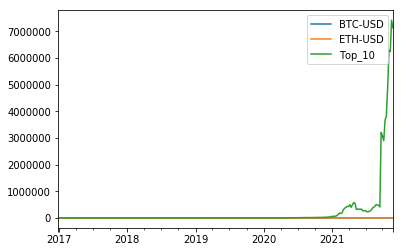

In [196]:
%matplotlib inline

df_results.plot()

In [28]:
data = yf.download('BTC-USD', interval='1wk', start="2017-01-01", end="2021-12-01")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-26,960.627014,1003.080017,947.236023,998.325012,998.325012,246910112
2017-01-02,998.617004,1191.099976,823.556030,911.198975,911.198975,2052639008
2017-01-09,913.244019,919.447998,755.755981,821.797974,821.797974,1123984880
2017-01-16,821.783020,937.525024,820.270996,924.672974,924.672974,883611600
2017-01-23,925.499023,928.265991,891.687012,919.495972,919.495972,693151900
...,...,...,...,...,...,...
2021-11-01,61320.449219,64242.792969,59695.183594,63326.988281,63326.988281,227064607869
2021-11-08,63344.066406,68789.625000,62333.914062,65466.839844,65466.839844,259776276520
2021-11-15,65521.289062,66281.570312,55705.179688,58730.476562,58730.476562,253419951009


In [188]:
(57000-998)/998


56.11422845691383

In [184]:
pd.read_csv('data/ETH-USD.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-26,8.151150,8.471230,7.909380,8.172570,8.172570,23798500
1,2017-01-02,8.170870,11.890900,8.054410,10.289800,10.289800,200115400
2,2017-01-09,10.313800,10.783800,9.175580,9.904260,9.904260,153865600
3,2017-01-16,9.883530,10.977800,9.544620,10.703200,10.703200,84074070
4,2017-01-23,10.709900,10.844700,10.429300,10.484000,10.484000,49270830
...,...,...,...,...,...,...,...
253,2021-11-01,4288.217285,4664.910156,4160.966797,4620.554688,4620.554688,121471900421
254,2021-11-08,4619.649414,4859.502930,4485.093262,4626.358887,4626.358887,125752889256
255,2021-11-15,4627.090820,4891.704590,3959.227783,4269.732910,4269.732910,137429429244
256,2021-11-22,4266.509277,4550.842285,3933.506592,4294.453613,4294.453613,141179727084


In [185]:
(4631-8)/8

577.875